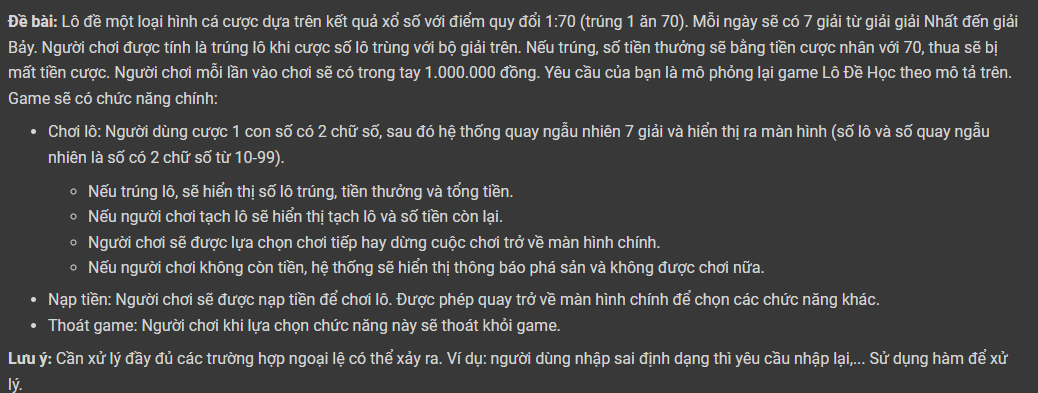
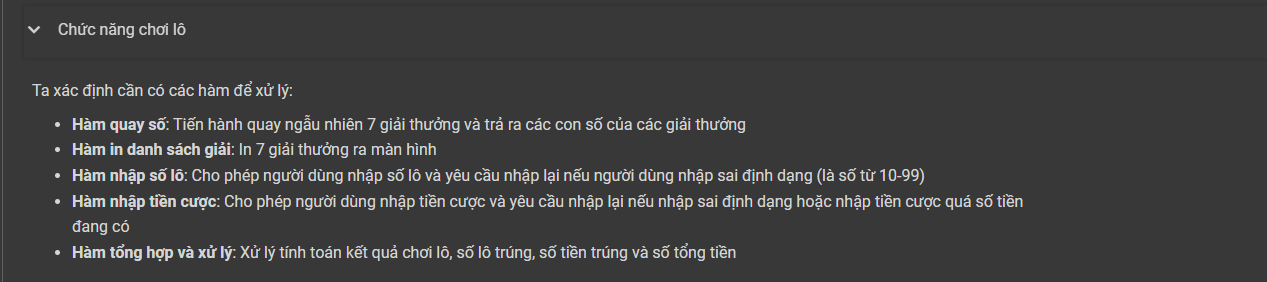

#### Nâng cấp

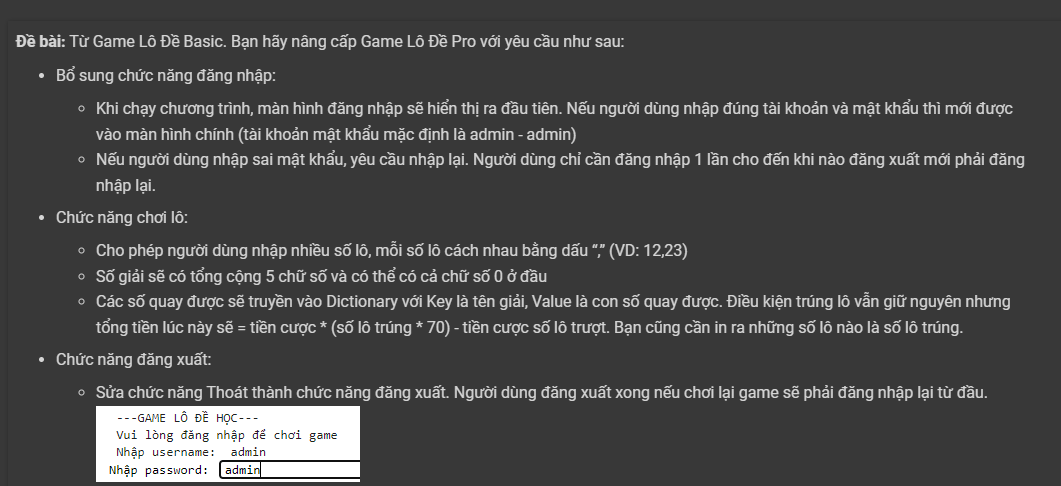

In [ ]:
import random
from IPython.display import clear_output

tong_tien = 1000000

global tong_tien
def quay_so():
    ds_giai = {}

    ten_giai = ["GIẢI NHẤT", "GIẢI NHÌ", "GIẢI BA", "GIẢI TƯ", "GIẢI NĂM", "GIẢI SÁU", "GIẢI BẢY"]

    for giai in ten_giai:
        so = ""
        for i in range(5):
            so += str(random.randint(0, 9))  # Tạo một chữ số ngẫu nhiên từ 0 đến 9 và thêm vào số
        ds_giai[giai] = so

    return ds_giai
    # giai_nhat = random.randint(10,99)
    # giai_hai = random.randint(10,99)
    # giai_ba = random.randint(10,99)
    # giai_tu = random.randint(10,99)
    # giai_nam = random.randint(10,99)
    # giai_sau = random.randint(10,99)
    # giai_bay = random.randint(10,99)
    # return giai_nhat, giai_hai, giai_ba, giai_tu, giai_nam, giai_sau, giai_bay

def in_ds_giai(ds_giai):
    print("---DANH SÁCH GIẢI---")
    for giai, so in ds_giai.items():
        print(f"Giai {giai}: {so}")

# def nhap_lo():
#     while True:
#         so_lo = input("Nhập số lô muốn cược (10-99): ")
#         if so_lo.isdigit() and 10 <= int(so_lo) <= 99:
#             return int(so_lo)
#         else:
#             print("Nhập sai định dạng, nhập lại!")


def nhap_so_lo():
    while True:
        ds_so_lo = input("Nhập số lô muốn cược (10-99), cách nhau bằng dấu (,): ").split(',')
        so_lo_hop_le = True

        for so_lo in ds_so_lo:
            if len(so_lo)!=2 or not so_lo.isdigit():
                print("Số lô nhập không hợp lệ. Vui lòng nhập lại.")
                so_lo_hop_le = False
                break

        if so_lo_hop_le:
            return ds_so_lo

def nhap_tien_cuoc(tong_so_lo):
    
    while True:
        tien_cuoc = input("Nhập tiền muốn cược (tiền cược < tổng tiền bạn có): ")
        if tien_cuoc.isdigit() and int(tien_cuoc) * tong_so_lo <= tong_tien:
            return int(tien_cuoc)
        else:
            print("Nhập sai định dạng hoặc số tiền còn lại < tổng tiền. Nhập lại")

def man_hinh_quay_so(ds_so_lo, tien_cuoc):
    global tong_tien
    ds_giai = quay_so()
    
    in_ds_giai(ds_giai)
    dem_so_lo = 0
    so_lo_trung = []
    
    print(f"Những số lô bạn chơi là: {ds_so_lo}")
    for giai, so_giai in ds_giai.items():
        for so_lo in ds_so_lo:
            if so_lo == so_giai[-2:]:
                dem_so_lo += 1
                so_lo_trung.append(so_lo)
            
    if dem_so_lo > 0:
        tien_thang = (tien_cuoc * dem_so_lo) * 70
        tien_thua = tien_cuoc * (len(ds_so_lo)) - len(so_lo_trung)
        tong_tien += tien_thang - tien_thua
      
        print(f"Bạn đã trúng {dem_so_lo} số!")
        print('Các số lô trúng:', ', '.join(so_lo_trung))
        print(f"Số tiền bạn trúng là {tien_thang}")
        print(f"Số tiền bạn thua là {tien_thua}")        
        print(f"Tổng tiền bạn có là {tong_tien}")
    else:
        tien_thua = tien_cuoc * len(ds_so_lo)
        tong_tien -= tien_thua
        
        print("Bạn đã thua lô!")
        print(f"Số tiền bạn thua là {tien_thua}") 
        print(f"Tổng tiền bạn còn là {tong_tien}")

def nap_tien():
    global tong_tien
    while True:
        so_tien_nap = int(input("Nhập số tiền mà bạn muốn nạp: "))
        tong_tien += so_tien_nap
        print(f"Tổng tiền sau khi bạn nạp là {tong_tien}")
        nap_tiep = int(input("Bạn có muốn nạp tiếp không? (0: không, 1: có)"))
        if nap_tiep == 0:
            break
        else:
            continue

dang_nhap_status = True
def dang_nhap():
    global dang_nhap_status
    print("---GAME LÔ ĐỀ HỌC---")
    print("Vui lòng đăng nhập để chơi game")
    
    while True:
        username = input('Nhập tên đăng nhập: ')
        password = input('Nhập mật khẩu: ')

        if username == 'admin' and password == 'admin':
            dang_nhap_status = True
            break
        else:
            print('Tên đăng nhập hoặc mật khẩu sai. Nhập lại! ')
    clear_output()
    menu()

def menu():
    print("GAME LÔ ĐỀ ")
    print("1. Chơi lô")
    print("2. Nạp tiền")
    print("3. Đăng xuất")


def main():
    global dang_nhap_status
    if dang_nhap_status == True:
        dang_nhap()
    else:
        menu()
    while True:
        lua_chon = int(input("Bạn chọn: "))
        match lua_chon:
            case 1:
                clear_output(wait=True)
                while True:
                    so_lo = nhap_so_lo()
                    tien_cuoc = nhap_tien_cuoc(len(so_lo))
                    man_hinh_quay_so(so_lo, tien_cuoc)
                    choi_tiep = int(input("Bạn có muốn chơi tiếp không? (0: không, 1: có)"))
                    if choi_tiep == 0:
                        break
                clear_output(wait=True)
                main()
                break
            case 2:
                clear_output(wait=True)
                nap_tien()
                clear_output(wait=True)
                main()
                break
            case 3:
                dang_nhap_status = False
                print("Chào bạn, hẹn gặp lại!")
                break
            case _:
                print("Nhập sai lựa chọn, vui lòng nhập lại !")

main()

Nhập số lô muốn cược (10-99), cách nhau bằng dấu (,):  34,57,64,21,98
Nhập tiền muốn cược (tiền cược < tổng tiền bạn có):  400000


---DANH SÁCH GIẢI---
Giai GIẢI NHẤT: 82354
Giai GIẢI NHÌ: 33806
Giai GIẢI BA: 01283
Giai GIẢI TƯ: 67628
Giai GIẢI NĂM: 16499
Giai GIẢI SÁU: 69797
Giai GIẢI BẢY: 87111
Những số lô bạn chơi là: ['34', '57', '64', '21', '98']
Bạn đã thua lô!
Số tiền bạn thua là 2000000
Tổng tiền bạn còn là 960000


In [ ]:
00

